## Load packages:

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.neighbors import BallTree
from sklearn.metrics import f1_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
import urllib.request as ur
from gzip import GzipFile
import pandas as pd
%matplotlib inline


### load data

In [5]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')
df.head()

,SUBJECTN,CLIN,SEX,V1,V2,V3,V4,V5,V6,V7,...,D6-6_7-DseqL,D6-6_8-DseqL,D6-6_9-DseqL,D7-27_10-DseqL,D7-27_11-DseqL,D7-27_5-DseqL,D7-27_6-DseqL,D7-27_7-DseqL,D7-27_8-DseqL,D7-27_9-DseqL
0,BC_10,Healthy,NaN,0.232505,0.025345,0.431113,0.243586,0.058649,0.008521,0.000281,...,0.001649,0.002958,0.003220,0.000340,0.000445,0.000393,0.001545,0.002644,0.001466,0.001492
1,BC_11,Healthy,NaN,0.213667,0.026993,0.466993,0.238861,0.044784,0.008565,0.000137,...,0.001221,0.001990,0.002482,0.001064,0.001044,0.000571,0.001655,0.002876,0.001931,0.002581
2,BC_12,Healthy,NaN,0.208928,0.025766,0.401013,0.307753,0.032451,0.010218,0.013870,...,0.001862,0.003826,0.003060,0.000179,0.000485,0.000281,0.001301,0.002040,0.001403,0.001479
3,BC_13,Healthy,NaN,0.208727,0.048319,0.402105,0.284245,0.049473,0.006873,0.000258,...,0.001461,0.002534,0.002176,0.000388,0.000537,0.000224,0.001461,0.002385,0.001610,0.002012
4,BC_14,Healthy,NaN,0.248387,0.022468,0.449467,0.224517,0.047101,0.007833,0.000227,...,0.001128,0.002020,0.002020,0.000437,0.000218,0.000382,0.001383,0.001383,0.000965,0.000855


##  2.1. Feature Selection- Our Method - based on KS test

In [7]:
# import packages
from scipy import stats #for KS test
import collections # for find duplicate variables
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter

# load data 
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')  #load data
X = df.iloc[:,3:]
y = df.loc[:,'CLIN']

# initialization
seed= 42
informative_columns = []
KS_fold_number = 10
subset_data_percent = 0.8
test_size_fold = 1-subset_data_percent

# loop for merge informative_features from each 10 different subset data.
# informative_features choose if for KS test between celiac&healty distribution 
# the p_value is less then 0.05.
# in order to get different subset in each iteration we used different seeds 
# for train_test_split function
for i in range(1,KS_fold_number):
    # split to 80% data [change seed in each iteration]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size_fold, random_state=seed+i)
    xy_train_subset = x_train
    xy_train_subset.insert(loc=0,column='CLIN',value= list(y_train))
    #separate data to healthy and celiac data
    data_features = xy_train_subset
    dist_healthy = data_features.loc[data_features['CLIN']== 'Healthy']
    dist_celiac = data_features.loc[data_features['CLIN']== 'Celiac']
    # loop for calculate KS test(for each feature name) between Celiac to healthy feature's distribution.
    # and save feature names with pvalue < 0.05
    col_num = len(xy_train_subset.columns.values)
    for idx_col in range(1,col_num):
        dist_healthy_feature = dist_healthy.iloc[:,idx_col]
        dist_celiac_feature = dist_celiac.iloc[:,idx_col]
        score = stats.ks_2samp(dist_healthy_feature, dist_celiac_feature)
        if score.pvalue < 0.05 :
            # save columns names of informative features for this xy_train iteration
            informative_columns.append(xy_train_subset.columns[idx_col])
            # if you want to print each iteration results:
             ##print(xy_train_subset.columns[idx_col])
             ##print(stats.ks_2samp(dist_healthy_feature, dist_celiac_feature) )


            
# Choose the duplicate features
import collections
a = informative_columns
# save list with count numbers of duplicate features
informative_duplicate_count = pd.Series(a).value_counts() 
vc = informative_duplicate_count
# save list of duplicate features's names in decending order
informative_features_after_KS_folds_80 = vc[vc > 2].index.tolist()
# print final result:
print(informative_features_after_KS_folds_80)
print(informative_duplicate_count)

['J1*01', 'V4-59_J1*01', 'D4_9-DseqL', 'V3_J1_x', 'D1-14_8-DseqL', 'V6_J6_x', 'J1', 'D3-9_10-DseqL', 'D3-9_25-DseqL', 'D3-10_26-DseqL', 'D3-9_20-DseqL', 'D2-15_15-DseqL', 'V1-3', 'V6-1*01', 'D5-18_15-DseqL', 'D4-17_5-DseqL', 'D2-21_28-DseqL', 'D3-10_13-DseqL', 'V6-1', 'V6', 'V6-1_J3*02', 'D3-9_21-DseqL', 'V3-11_J3*02', 'D3-16_15-DseqL', 'D2_25-DseqL', 'D3-16_19-DseqL', 'V3_J6_x', 'D3-10_15-DseqL', 'D3-9', 'D3-9*01', 'IGM', 'D2-8_30-DseqL', 'D1-20_8-DseqL', 'V4-61_J3*02', 'D5-18_6-DseqL', 'V2-5_J3*02', 'D4-23_13-DseqL', 'V3_J2_x', 'V5_J1_x', 'D5-18_16-DseqL', 'D3-10_16-DseqL', 'D3-10_19-DseqL', 'D1_18-DseqL', 'V3-48*01', 'V1-3*01', 'V1-2_J1*01', 'V1-24_J5*02', 'V3_J3_x', 'D3/OR15-3a_13-DseqL', 'V3-49*03', 'D2-21_6-DseqL', 'V1-3_J4*02', 'D3_13-DseqL', 'D1-26_18-DseqL', 'D1_16-DseqL', 'D3-22_5-DseqL', 'D1-20_17-DseqL', 'D6-6_6-DseqL']
J1*01                 9
V4-59_J1*01           9
D4_9-DseqL            8
V3_J1_x               8
D1-14_8-DseqL         8
V6_J6_x               8
J1          

##  2.2 Feature Selection- by random forest

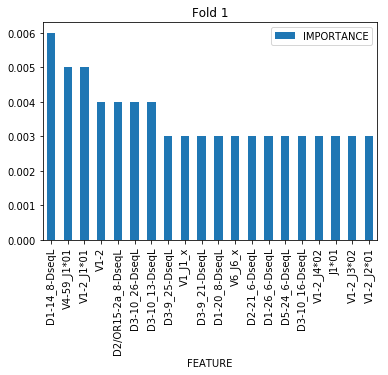

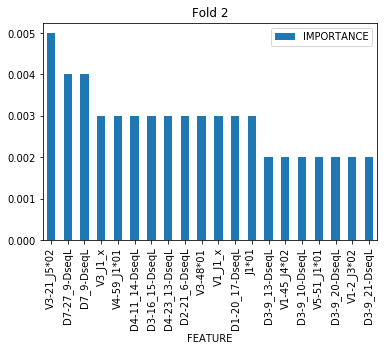

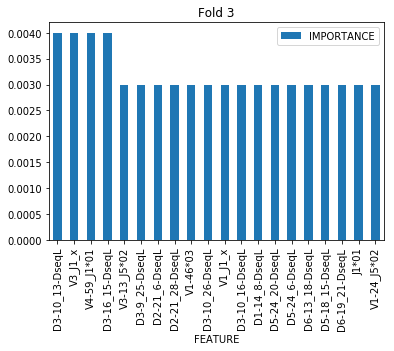

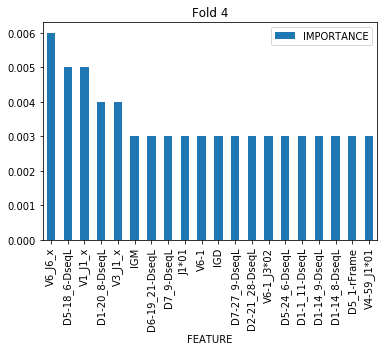

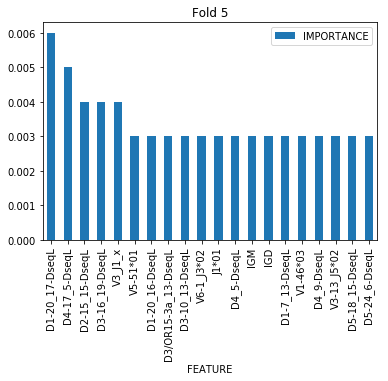

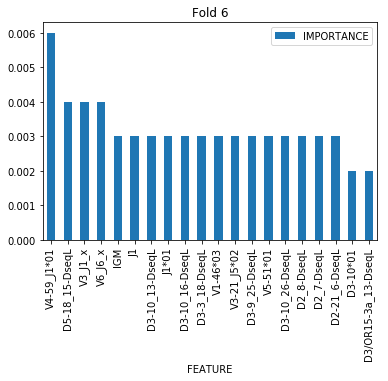

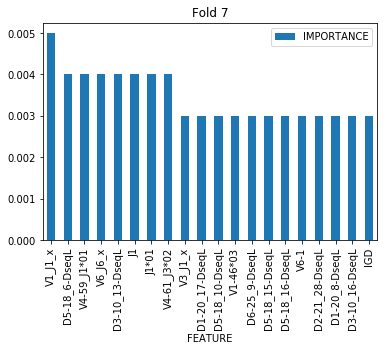

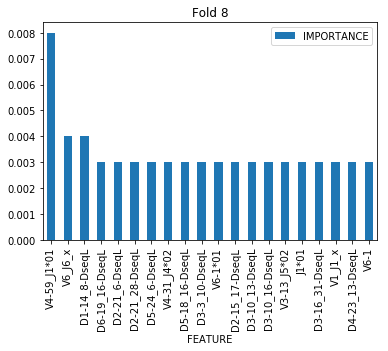

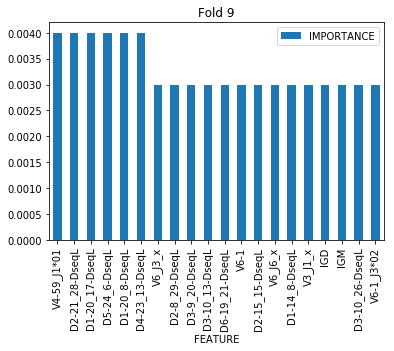

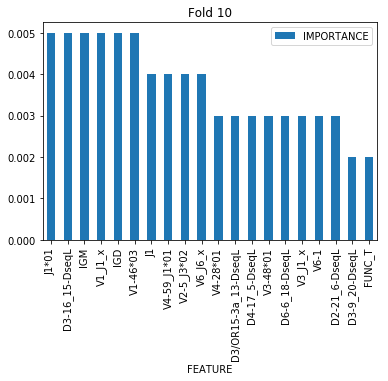

The mean importances of each feature over all the folds
                IMPORTANCE
FEATURE                   
V4-59_J1*01         0.0043
V1_J1_x             0.0034
V6_J6_x             0.0034
J1*01               0.0033
V3_J1_x             0.0032
D1-14_8-DseqL       0.0028
D3-10_13-DseqL      0.0028
IGM                 0.0028
IGD                 0.0027
D5-24_6-DseqL       0.0027
D1-20_17-DseqL      0.0027
J1                  0.0027
D2-21_28-DseqL      0.0026
D2-21_6-DseqL       0.0026
D3-16_15-DseqL      0.0025
D1-20_8-DseqL       0.0025
V1-46*03            0.0025
V3-21_J5*02         0.0024
V3-13_J5*02         0.0024
D5-18_15-DseqL      0.0024


In [14]:
#Visualize features importance for each fold by random forest

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification

# load data
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

# splitting to features_data and target
data_x = df.iloc[:,3:]
feature_names = data_x.columns
data_y = pd.factorize(df['CLIN'])[0]

# define K-fold and random forest classifier
kf = KFold(n_splits=10,shuffle = True)
rfc = RandomForestClassifier(n_estimators=10000)
# initialize variables for loop
count = 1
all_importances = pd.DataFrame() 
# test data is not needed for fitting
for train, _ in kf.split(data_x, data_y):
    rfc.fit(data_x.iloc[train,:], data_y[train])
    # sort the feature index by importance score in descending order
    importances_index_desc = np.argsort(rfc.feature_importances_)[::-1]
    feature_labels = [feature_names[i] for i in importances_index_desc]
    importances1 = pd.DataFrame({'FEATURE':data_x.columns,'IMPORTANCE':np.round(rfc.feature_importances_,3)})
    importances = importances1.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')
    # append importance features of all the folds
    all_importances = all_importances.append(importances1) 
    
    # plot
    plt.figure()
    importances[0:20].plot.bar()
    plt.title('Fold {}'.format(count))
    count = count + 1
plt.show()

# Lets calculate the mean importances of each feature over all the folds and then sort it by descending order.
all_importances_mean = all_importances.groupby('FEATURE').mean()
all_importances_sort = all_importances_mean.sort_values('IMPORTANCE',ascending=False)
print('The mean importances of each feature over all the folds')
# print list of the best importances features
print(all_importances_sort[0:20])

## 3. Tuned hyperparameters and Compare Algorithms

### 3.1 For all the features

accuracy results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.190000 (0.221133)
RF: 0.352222 (0.213093)
NB: 0.571111 (0.126608)
SVM: 0.407778 (0.183253)
KNN: 0.434444 (0.169126)
DT: 0.468889 (0.148723)


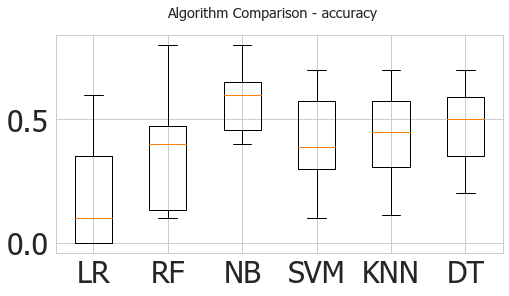

f1_macro results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.132738 (0.145853)
RF: 0.317770 (0.235387)
NB: 0.459151 (0.129199)
SVM: 0.319121 (0.144642)
KNN: 0.345725 (0.143453)
DT: 0.336951 (0.125303)


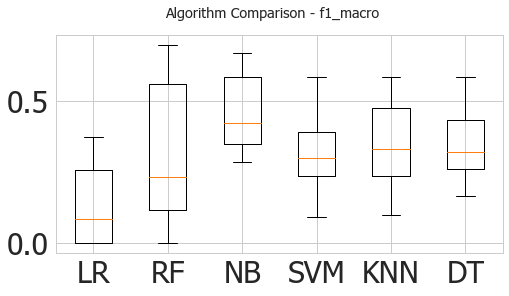

recall results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.300000 (0.458258)
RF: 0.282500 (0.248005)
NB: 0.288333 (0.203039)
SVM: 0.347500 (0.363051)
KNN: 0.410000 (0.300458)
DT: 0.295833 (0.214257)


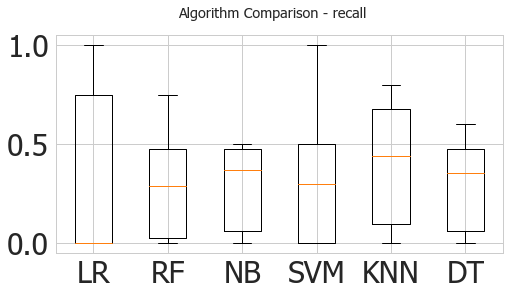

precision results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.150000 (0.233452)
RF: 0.425714 (0.394337)
NB: 0.633333 (0.433333)
SVM: 0.461905 (0.431469)
KNN: 0.480000 (0.358637)
DT: 0.507143 (0.380662)


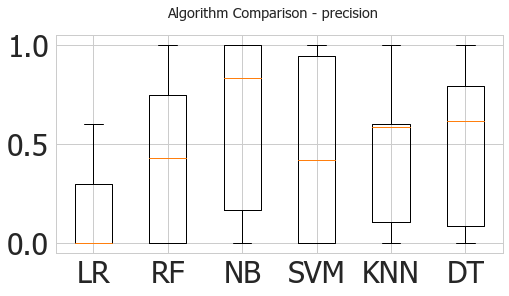

In [171]:
# Compare Algorithms - for all the features
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import random

# when we have no healthy or celiac target in the test set we get an warning for f1 & recall scores
# In order not to see warnings we used:
import warnings
warnings.filterwarnings("ignore")

# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME') #load data
X = df.iloc[:,3:]
#Y = df.loc[:,'CLIN']
Y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers

# prepare configuration for cross validation test harness
# Enter seed before all model defenition!! 
seed = 7
# try diffrent cross-validation(cv) technique
cv_shuffel = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)
kfold = model_selection.KFold(n_splits=10, random_state=seed)


# Enter seed before all model defenition!! 
random.seed(1234)
# prepare models
models = []
models.append(('LR', LogisticRegression(C=0.28273756267323114, class_weight=None, dual=False,
                      fit_intercept=True, intercept_scaling=1, max_iter=100,
                      multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
                      solver='liblinear', tol=0.0001, verbose=0, warm_start=False)))
models.append(('RF', RandomForestClassifier(criterion= 'gini',min_samples_split= 8, max_depth= 4, max_features= 'log2', n_estimators=200)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
                      max_iter=-1, probability=False, random_state=42, shrinking=True,
                      tol=0.001, verbose=False)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

# loop for calculate different scores
scoring_name_list= ["accuracy", "f1_macro", "recall","precision"]
for score_name in scoring_name_list:
    # evaluate each model in turn
    results = []
    names = []
    Scoring = score_name
    print(Scoring, 'results after 10-fold CV:')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    for name, model in models:
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=Scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # boxplot algorithm comparison
    fig = plt.figure(figsize=(8,4))
    title = 'Algorithm Comparison' + ' - ' +score_name
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()



### 3.2 compare algorithms (only for select features)

accuracy results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.402222 (0.221711)
RF: 0.698889 (0.209612)
NB: 0.720000 (0.142187)
SVM: 0.340000 (0.280000)
KNN: 0.498889 (0.161509)
DT: 0.562222 (0.145653)


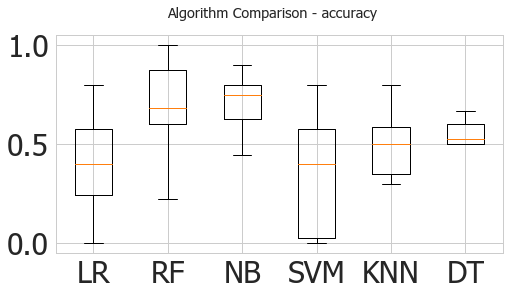

f1_macro results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.344470 (0.211994)
RF: 0.574440 (0.233568)
NB: 0.583817 (0.220590)
SVM: 0.309146 (0.261378)
KNN: 0.419593 (0.174649)
DT: 0.449578 (0.135587)


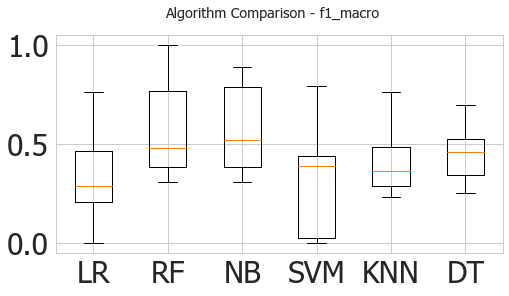

recall results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.402500 (0.346491)
RF: 0.565000 (0.390704)
NB: 0.535000 (0.362664)
SVM: 0.271667 (0.241299)
KNN: 0.368333 (0.263992)
DT: 0.432500 (0.314653)


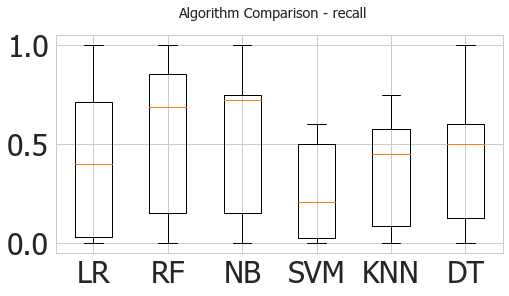

precision results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.552857 (0.401518)
RF: 0.629762 (0.424399)
NB: 0.651429 (0.431949)
SVM: 0.633333 (0.458258)
KNN: 0.550238 (0.412427)
DT: 0.530952 (0.383777)


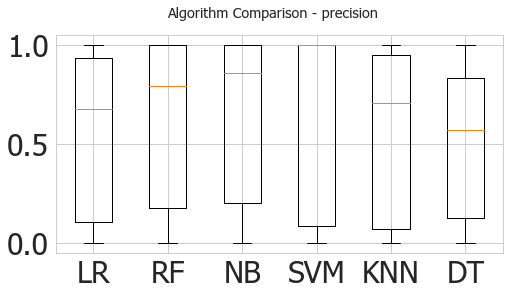

In [170]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import random

import matplotlib.pyplot as mpl
mpl.rcParams['font.size'] = 12

# when we have no healthy or celiac target in the test set we get an warning for f1 & recall scores
# In order not to see warnings we used:
import warnings
warnings.filterwarnings("ignore")
# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME') #load data
X = df.loc[:,rf_important_features_list[0:30]]
#Y = df.loc[:,'CLIN']
Y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers

# prepare configuration for cross validation test harness
# Enter seed before all model defenition!! 
seed = 7
# try diffrent cross-validation(cv) technique
cv_shuffel = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)
kfold = model_selection.KFold(n_splits=10, random_state=seed)


# Enter seed before all model defenition!! 
random.seed(1234)
# prepare models
models = []
models.append(('LR', LogisticRegression(C=1000,penalty='l2')))
models.append(('RF', RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators=200)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
                      max_iter=-1, probability=False, random_state=None, shrinking=True,
                      tol=0.001, verbose=False)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

# loop for calculate different scores
scoring_name_list= ["accuracy", "f1_macro", "recall","precision"]
for score_name in scoring_name_list:
    # evaluate each model in turn
    results = []
    names = []
    Scoring = score_name
    print(Scoring, 'results after 10-fold CV:')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    for name, model in models:
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=Scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # boxplot algorithm comparison
    fig = plt.figure(figsize=(8,4))
    title = 'Algorithm Comparison' + ' - ' +score_name
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()



## 4. ML evaluation

###  Select features using training set and check performance with compare to testing set

### 4.1 Gaussian

In [177]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

# load data
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

# splitting to features_data and target
data_x = df.iloc[:,3:]
feature_names = data_x.columns
data_y = pd.factorize(df['CLIN'])[0]

F1_sum = 0
seed = 42
seed_vector = [2,0,-5,9,6,20,-12,3]
#seed_vector =[2,0,-5,9,6,1,3,5,-20]
for i in seed_vector :
        df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

        train_features, test_features, train_labels, test_labels = train_test_split(  
                                            df.iloc[:,3:], pd.factorize(df['CLIN'])[0],test_size=0.3, random_state=seed + i )
        # select important features
        feature_selector = RandomForestClassifier(n_estimators=100)

        features = feature_selector.fit(train_features, train_labels)

        # sort the feature index by importance score in descending order
        importances_index_desc = np.argsort(feature_selector.feature_importances_)[::-1]
        feature_labels = [feature_names[i] for i in importances_index_desc]
        importances1 = pd.DataFrame({'FEATURE':data_x.columns,'IMPORTANCE':np.round(rfc.feature_importances_,3)})
        importances = importances1.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')
        # columns' names of importnt features (take the first 30)
        filtered_features = list(importances.index)[0:30]
        # Now to see the classification performance of the random forest using important features
        #clf = RandomForestClassifier(n_estimators=100, random_state=23, max_depth=3)  
        clf = GaussianNB()
        clf.fit(train_features.loc[:,filtered_features], train_labels)
        
        print('~~~~~~~~~~~~~~~~~~~~seed: ',seed+i,'~~~~~~~~~~~~~~~~~~~~~~~~~~')

        print(' \n \n ~~~~For Train Set~~~~')
        train_pred = clf.predict(train_features.loc[:,filtered_features])  
        print('Roc_auc on training set: {}'.format(roc_auc_score(train_labels, train_pred)))
        print('Confusion matrix on training set: \n ',(confusion_matrix(train_labels, train_pred)))
        print('F1 on training set: {}'.format(f1_score(train_labels, train_pred)))
        print('precision on training set: {}'.format(precision_score(train_labels, train_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(train_labels, train_pred))) 

        print(' \n \n ~~~~For Test Set~~~~')

        test_pred = clf.predict(test_features.loc[:,filtered_features])  
        print('Roc_auc on test set: {}'.format(roc_auc_score(test_labels, test_pred ))) 
        print('Confision matrix on training set: \n', (confusion_matrix(test_labels, test_pred)))
        print('F1 on training set: {}'.format(f1_score(test_labels, test_pred)))
        print('precision on training set: {}'.format(precision_score(test_labels, test_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(test_labels, test_pred)))
        print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

        F1_sum = F1_sum + f1_score(test_labels, test_pred)

F1_mean = F1_sum/ len(seed_vector)
print('F1 mean over ',len(seed_vector),' folds :' ,F1_mean)

~~~~~~~~~~~~~~~~~~~~seed:  44 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 0.7291666666666667
Confusion matrix on training set: 
  [[28  4]
 [15 21]]
F1 on training set: 0.6885245901639344
precision on training set: 0.84
Accuracy on training set: 0.7205882352941176
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.7333333333333334
Confision matrix on training set: 
 [[10  5]
 [ 3 12]]
F1 on training set: 0.7500000000000001
precision on training set: 0.7058823529411765
Accuracy on training set: 0.7333333333333333

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  42 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 0.7385281385281386
Confusion matrix on training set: 
  [[28  5]
 [13 22]]
F1 on training set: 0.7096774193548386
precision on training set: 0.8148148148148148
Accuracy on training set: 0.7352941176470589
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.6517857142857143
Co

### 4.2 With Random Forest

In [175]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

# load data
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

# splitting to features_data and target
data_x = df.iloc[:,3:]
feature_names = data_x.columns
data_y = pd.factorize(df['CLIN'])[0]

F1_sum = 0
seed = 42
seed_vector = [2,0,-5,9,6,1,3,5,-20]
for i in seed_vector :
        df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

        train_features, test_features, train_labels, test_labels = train_test_split(  
                                            df.iloc[:,3:], pd.factorize(df['CLIN'])[0],test_size=0.3, random_state=seed + i )
        # select important features
        feature_selector = RandomForestClassifier(n_estimators=100)

        features = feature_selector.fit(train_features, train_labels)

        # sort the feature index by importance score in descending order
        importances_index_desc = np.argsort(feature_selector.feature_importances_)[::-1]
        feature_labels = [feature_names[i] for i in importances_index_desc]
        importances1 = pd.DataFrame({'FEATURE':data_x.columns,'IMPORTANCE':np.round(rfc.feature_importances_,3)})
        importances = importances1.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')
        # columns' names of importnt features (take the first 30)
        filtered_features = list(importances.index)[0:30]
        # Now to see the classification performance of the random forest using important features
        #clf = RandomForestClassifier(n_estimators=100, random_state=23, max_depth=3)  
        clf =  RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators=200)
        clf.fit(train_features.loc[:,filtered_features], train_labels)
        
        print('~~~~~~~~~~~~~~~~~~~~seed: ',seed+i,'~~~~~~~~~~~~~~~~~~~~~~~~~~')

        print(' \n \n ~~~~For Train Set~~~~')
        train_pred = clf.predict(train_features.loc[:,filtered_features])  
        print('Roc_auc on training set: {}'.format(roc_auc_score(train_labels, train_pred)))
        print('Confusion matrix on training set: \n ',(confusion_matrix(train_labels, train_pred)))
        print('F1 on training set: {}'.format(f1_score(train_labels, train_pred)))
        print('precision on training set: {}'.format(precision_score(train_labels, train_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(train_labels, train_pred))) 

        print(' \n \n ~~~~For Test Set~~~~')

        test_pred = clf.predict(test_features.loc[:,filtered_features])  
        print('Roc_auc on test set: {}'.format(roc_auc_score(test_labels, test_pred ))) 
        print('Confision matrix on training set: \n', (confusion_matrix(test_labels, test_pred)))
        print('F1 on training set: {}'.format(f1_score(test_labels, test_pred)))
        print('precision on training set: {}'.format(precision_score(test_labels, test_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(test_labels, test_pred)))
        print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

        F1_sum = F1_sum + f1_score(test_labels, test_pred)

F1_mean = F1_sum/ len(seed_vector)
print('F1 mean over ',len(seed_vector),' folds :' ,F1_mean)

~~~~~~~~~~~~~~~~~~~~seed:  44 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[32  0]
 [ 0 36]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.6666666666666667
Confision matrix on training set: 
 [[ 9  6]
 [ 4 11]]
F1 on training set: 0.6875
precision on training set: 0.6470588235294118
Accuracy on training set: 0.6666666666666666

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  42 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[33  0]
 [ 0 35]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.7455357142857143
Confision matrix on training set: 
 [[13  1]
 [ 7  9]]
F1 on training set: 0.6923076923076923
precision on training set:

WITH 100 FOLDS

In [209]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

# load data
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

# splitting to features_data and target
data_x = df.iloc[:,3:]
feature_names = data_x.columns
data_y = pd.factorize(df['CLIN'])[0]

F1_sum = 0
seed = 42
seed_vector = range(-20,100)
#seed_vector = [2,0,-5,9,6,1,3,5,-20]
for i in seed_vector :
        df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

        train_features, test_features, train_labels, test_labels = train_test_split(  
                                            df.iloc[:,3:], pd.factorize(df['CLIN'])[0],test_size=0.3, random_state=seed + i )
        # select important features
        feature_selector = RandomForestClassifier(n_estimators=100)

        features = feature_selector.fit(train_features, train_labels)

        # sort the feature index by importance score in descending order
        importances_index_desc = np.argsort(feature_selector.feature_importances_)[::-1]
        feature_labels = [feature_names[i] for i in importances_index_desc]
        importances1 = pd.DataFrame({'FEATURE':data_x.columns,'IMPORTANCE':np.round(rfc.feature_importances_,3)})
        importances = importances1.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')
        # columns' names of importnt features (take the first 30)
        filtered_features = list(importances.index)[0:30]
        # Now to see the classification performance of the random forest using important features
        #clf = RandomForestClassifier(n_estimators=100, random_state=23, max_depth=3)  
        clf =  RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators=200)
        clf.fit(train_features.loc[:,filtered_features], train_labels)
        
        print('~~~~~~~~~~~~~~~~~~~~seed: ',seed+i,'~~~~~~~~~~~~~~~~~~~~~~~~~~')

        print(' \n \n ~~~~For Train Set~~~~')
        train_pred = clf.predict(train_features.loc[:,filtered_features])  
        print('Roc_auc on training set: {}'.format(roc_auc_score(train_labels, train_pred)))
        print('Confusion matrix on training set: \n ',(confusion_matrix(train_labels, train_pred)))
        print('F1 on training set: {}'.format(f1_score(train_labels, train_pred)))
        print('precision on training set: {}'.format(precision_score(train_labels, train_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(train_labels, train_pred))) 

        print(' \n \n ~~~~For Test Set~~~~')

        test_pred = clf.predict(test_features.loc[:,filtered_features])  
        print('Roc_auc on test set: {}'.format(roc_auc_score(test_labels, test_pred ))) 
        print('Confision matrix on training set: \n', (confusion_matrix(test_labels, test_pred)))
        print('F1 on training set: {}'.format(f1_score(test_labels, test_pred)))
        print('precision on training set: {}'.format(precision_score(test_labels, test_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(test_labels, test_pred)))
        print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

        F1_sum = F1_sum + f1_score(test_labels, test_pred)

F1_mean = F1_sum/ len(seed_vector)
print('F1 mean over ',len(seed_vector),' folds :' ,F1_mean)

~~~~~~~~~~~~~~~~~~~~seed:  22 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[34  0]
 [ 0 34]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.7262443438914028
Confision matrix on training set: 
 [[12  1]
 [ 8  9]]
F1 on training set: 0.6666666666666667
precision on training set: 0.9
Accuracy on training set: 0.7

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  23 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[30  0]
 [ 0 38]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.669683257918552
Confision matrix on training set: 
 [[11  6]
 [ 4  9]]
F1 on training set: 0.6428571428571429
precision on training set: 0.6
Accuracy on tr

~~~~~~~~~~~~~~~~~~~~seed:  37 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[31  0]
 [ 0 37]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.6428571428571428
Confision matrix on training set: 
 [[ 8  8]
 [ 3 11]]
F1 on training set: 0.6666666666666667
precision on training set: 0.5789473684210527
Accuracy on training set: 0.6333333333333333

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  38 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[36  0]
 [ 0 32]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.5956937799043063
Confision matrix on training set: 
 [[ 5  6]
 [ 5 14]]
F1 on training set: 0.717948717948718
precision on tr

~~~~~~~~~~~~~~~~~~~~seed:  52 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[33  0]
 [ 0 35]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.6160714285714286
Confision matrix on training set: 
 [[ 5  9]
 [ 2 14]]
F1 on training set: 0.717948717948718
precision on training set: 0.6086956521739131
Accuracy on training set: 0.6333333333333333

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  53 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[32  0]
 [ 0 36]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.6666666666666666
Confision matrix on training set: 
 [[ 8  7]
 [ 3 12]]
F1 on training set: 0.7058823529411765
precision on tr

~~~~~~~~~~~~~~~~~~~~seed:  67 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[32  0]
 [ 0 36]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.7000000000000002
Confision matrix on training set: 
 [[12  3]
 [ 6  9]]
F1 on training set: 0.6666666666666665
precision on training set: 0.75
Accuracy on training set: 0.7

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  68 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[29  0]
 [ 0 39]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.763888888888889
Confision matrix on training set: 
 [[14  4]
 [ 3  9]]
F1 on training set: 0.7199999999999999
precision on training set: 0.692307692307692

~~~~~~~~~~~~~~~~~~~~seed:  82 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[31  0]
 [ 0 37]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.8705357142857143
Confision matrix on training set: 
 [[13  3]
 [ 1 13]]
F1 on training set: 0.8666666666666666
precision on training set: 0.8125
Accuracy on training set: 0.8666666666666667

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  83 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[33  0]
 [ 0 35]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.7767857142857143
Confision matrix on training set: 
 [[13  1]
 [ 6 10]]
F1 on training set: 0.7407407407407406
precision on training set:

~~~~~~~~~~~~~~~~~~~~seed:  97 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[35  0]
 [ 0 33]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.7361111111111112
Confision matrix on training set: 
 [[ 9  3]
 [ 5 13]]
F1 on training set: 0.7647058823529411
precision on training set: 0.8125
Accuracy on training set: 0.7333333333333333

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  98 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[34  0]
 [ 0 34]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.6877828054298641
Confision matrix on training set: 
 [[11  2]
 [ 8  9]]
F1 on training set: 0.6428571428571428
precision on training set:

~~~~~~~~~~~~~~~~~~~~seed:  112 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[33  0]
 [ 0 35]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.6339285714285714
Confision matrix on training set: 
 [[ 9  5]
 [ 6 10]]
F1 on training set: 0.6451612903225806
precision on training set: 0.6666666666666666
Accuracy on training set: 0.6333333333333333

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  113 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[34  0]
 [ 0 34]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.8054298642533937
Confision matrix on training set: 
 [[11  2]
 [ 4 13]]
F1 on training set: 0.8125
precision on training se

~~~~~~~~~~~~~~~~~~~~seed:  127 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[29  0]
 [ 0 39]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.7638888888888888
Confision matrix on training set: 
 [[11  7]
 [ 1 11]]
F1 on training set: 0.7333333333333334
precision on training set: 0.6111111111111112
Accuracy on training set: 0.7333333333333333

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  128 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[31  0]
 [ 0 37]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.6071428571428572
Confision matrix on training set: 
 [[ 8  8]
 [ 4 10]]
F1 on training set: 0.6250000000000001
precision on

## 4.3 Control - compare scores with shuffle test set
feature selected by random forest

In [197]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}

# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')
X = df.loc[:,rf_important_features_list[0:30]]
#X = df.loc[:,Best_Features_by_KS_and_RF]
#Y = df.loc[:,'CLIN']
Y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#model = RandomForestClassifier(criterion= 'gini',min_samples_split= 8, max_depth= 4, max_features= 'log2', n_estimators=200)
model =  RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators=200)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print ('Precision:', metrics.precision_score(y_test, y_pred,average='binary'))
# Shuffeled y_test
from sklearn.utils import shuffle
y_test_shuffle = shuffle(y_test)
print ('Precision after shuffle y_test:', metrics.precision_score(y_test_shuffle, y_pred,average='binary'))

print('y_test',y_test)
print('y_test_suffled',y_test_shuffle)
print('y_pred: ',y_pred)

print('\n For original model :',classification_report(y_test,y_pred))
print('\n For model with y_test shuffle : ',classification_report(y_test_shuffle,y_pred))


Precision: 0.875
Precision after shuffle y_test: 0.375
y_test [1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0]
y_test_suffled [0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0]
y_pred:  [0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0]

 For original model :              precision    recall  f1-score   support

          0       0.75      0.90      0.82        10
          1       0.88      0.70      0.78        10

avg / total       0.81      0.80      0.80        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.42      0.50      0.45        10
          1       0.38      0.30      0.33        10

avg / total       0.40      0.40      0.39        20



### Hirerchial clustering

All features: 


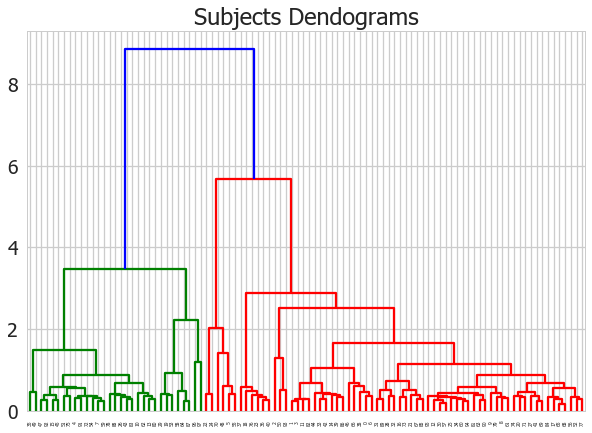

In [186]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

# load data 
data = df.iloc[:,3:].values  

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Subjects Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 
print('All features: ')

After features selected (by RF):


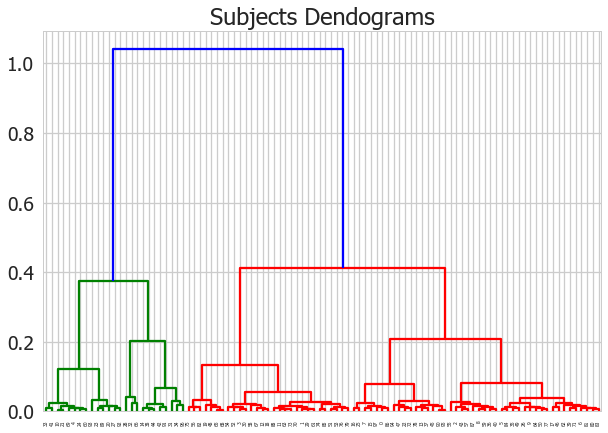

In [187]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

# load data 
data = df.loc[:,rf_important_features_list[0:30]].values  

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Subjects Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 
print('After features selected (by RF):')

### look on test set with low score

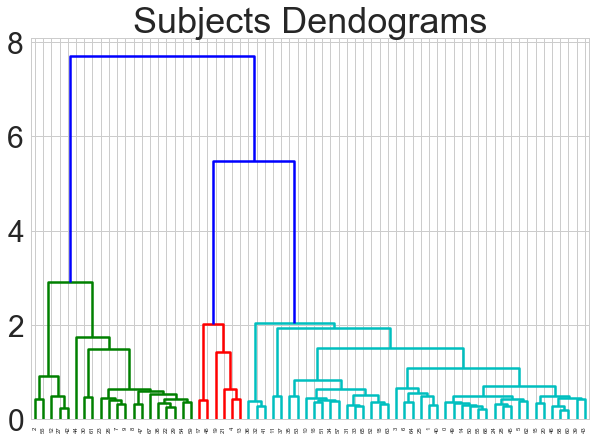

In [148]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

# load data 
data = train_features.iloc[:,3:].values  

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Subjects Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 

test_set

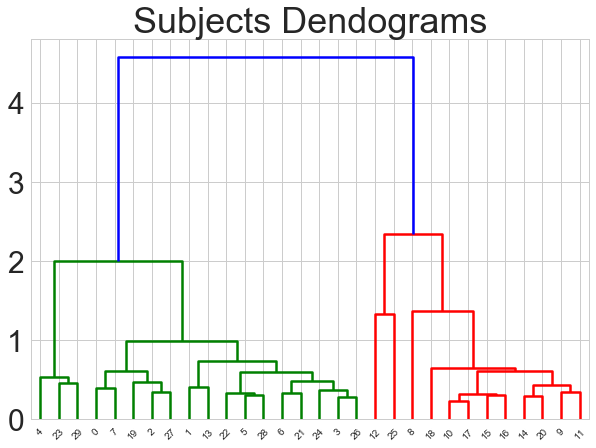

In [146]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

# load data 
data = test_features.iloc[:,3:].values  

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Subjects Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

## Look on selected features

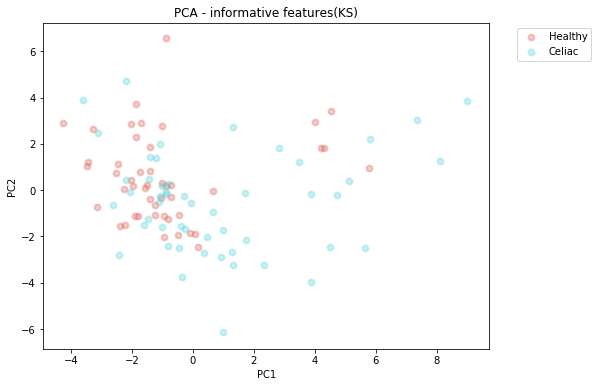

In [60]:
###  Only for Random forest features
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

# First, we'll need to scale our data so that each feature has a single unit variance.
from sklearn.preprocessing import scale
scaled_data = scale(df.loc[:,informative_features_after_KS_folds_80[0:30]])

    
# cellLabels = target_name (H / C)
cellLabels = df.iloc[:,1]
Counter(cellLabels)
target_name = df.CLIN.unique()

#%% PCA:
pca = PCA(n_components=2)
#Now we can transform this data to its first 2 principal components.
X_r = pca.fit_transform(scaled_data )

plt.figure(figsize=(8,6))
colors = sns.color_palette("hls", len(cellLabels.unique()))
lw = 2
for color,  target_name in zip(colors,cellLabels.unique() ) :
    IDX = [i for i,x in enumerate(cellLabels) if x==target_name]
    plt.scatter(X_r[IDX, 0], X_r[IDX, 1], color=color, alpha=.3, lw=lw,
                label=target_name)
plt.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1.05, 1))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - informative features(KS)');

## PCA for sekected features by random forest

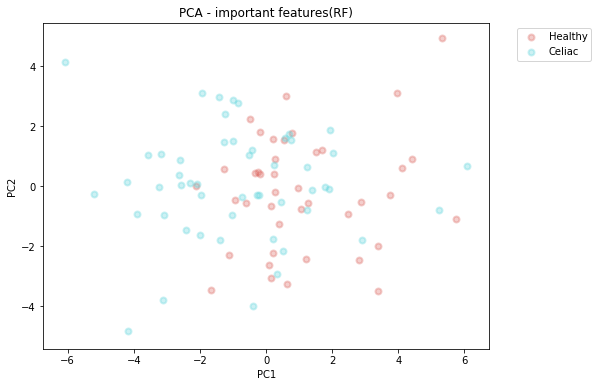

In [58]:
###  Only for Random forest features
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

rf_important_features_list = list(all_importances_sort.index)
# First, we'll need to scale our data so that each feature has a single unit variance.
from sklearn.preprocessing import scale
scaled_data = scale(df.loc[0:92,rf_important_features_list[0:30]])

    
# cellLabels = target_name (H / C)
cellLabels = df.iloc[0:92,1]
Counter(cellLabels)
target_name = df.CLIN.unique()

#%% PCA:
pca = PCA(n_components=2)
#Now we can transform this data to its first 2 principal components.
X_r = pca.fit_transform(scaled_data )

plt.figure(figsize=(8,6))
colors = sns.color_palette("hls", len(cellLabels.unique()))
lw = 2
for color,  target_name in zip(colors,cellLabels.unique() ) :
    IDX = [i for i,x in enumerate(cellLabels) if x==target_name]
    plt.scatter(X_r[IDX, 0], X_r[IDX, 1], color=color, alpha=.3, lw=lw,
                label=target_name)
plt.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1.05, 1))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - important features(RF)');

## 3.4 Visualization of 'informative_features' impact on health status
Here, we want to look on the distribution of the informative features as determined according KS test and random forest. We want to check that the features are reliable and not derived from outliers sequences in the repertoire.

In [61]:
print('RF important features: ')
print(rf_important_features_list[0:30])
print('\n KS important features: ')
print(informative_features_after_KS_folds_80[0:30])

RF important features: 
['V4-59_J1*01', 'V1_J1_x', 'V6_J6_x', 'J1*01', 'V3_J1_x', 'D1-14_8-DseqL', 'D3-10_13-DseqL', 'IGM', 'IGD', 'D5-24_6-DseqL', 'D1-20_17-DseqL', 'J1', 'D2-21_28-DseqL', 'D2-21_6-DseqL', 'D3-16_15-DseqL', 'D1-20_8-DseqL', 'V1-46*03', 'V3-21_J5*02', 'V3-13_J5*02', 'D5-18_15-DseqL', 'D6-6_18-DseqL', 'D7-27_9-DseqL', 'D3-9_25-DseqL', 'D7_9-DseqL', 'D4-17_5-DseqL', 'V6-1*01', 'V6-1', 'V6-1_J3*02', 'V6', 'D6-19_21-DseqL']

 KS important features: 
['J1*01', 'V4-59_J1*01', 'D4_9-DseqL', 'V3_J1_x', 'D1-14_8-DseqL', 'V6_J6_x', 'J1', 'D3-9_10-DseqL', 'D3-9_25-DseqL', 'D3-10_26-DseqL', 'D3-9_20-DseqL', 'D2-15_15-DseqL', 'V1-3', 'V6-1*01', 'D5-18_15-DseqL', 'D4-17_5-DseqL', 'D2-21_28-DseqL', 'D3-10_13-DseqL', 'V6-1', 'V6', 'V6-1_J3*02', 'D3-9_21-DseqL', 'V3-11_J3*02', 'D3-16_15-DseqL', 'D2_25-DseqL', 'D3-16_19-DseqL', 'V3_J6_x', 'D3-10_15-DseqL', 'D3-9', 'D3-9*01']


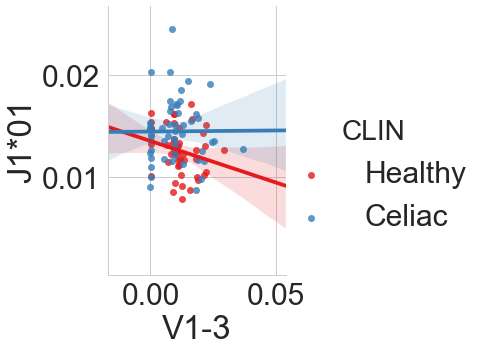

In [157]:
plt.figure(figsize=(11,7))
sns.lmplot(y='J1*01',x='V1-3',data=df,hue='CLIN',palette='Set1')
sns.despine()


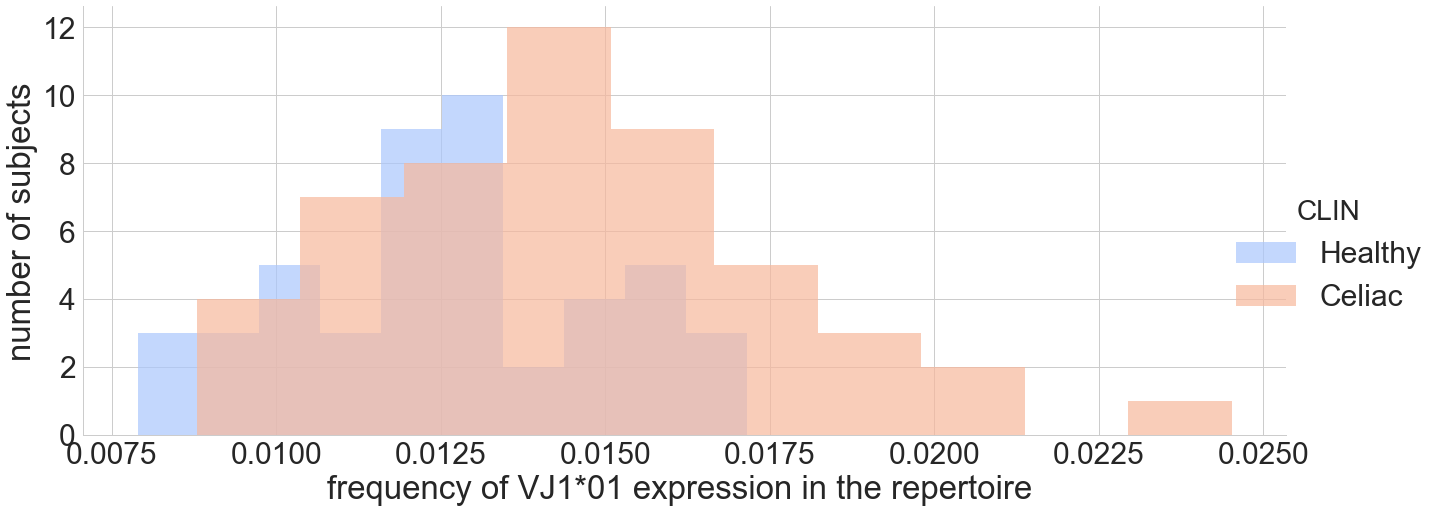

In [204]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(df,hue="CLIN",palette='coolwarm',size=8,aspect=3)
g = g.map(plt.hist,'J1*01',bins=10,alpha=0.7).add_legend().set_axis_labels(
    "frequency of J1*01 expression in the repertoire ", "number of subjects")
g.fig.set_size_inches(20,8)


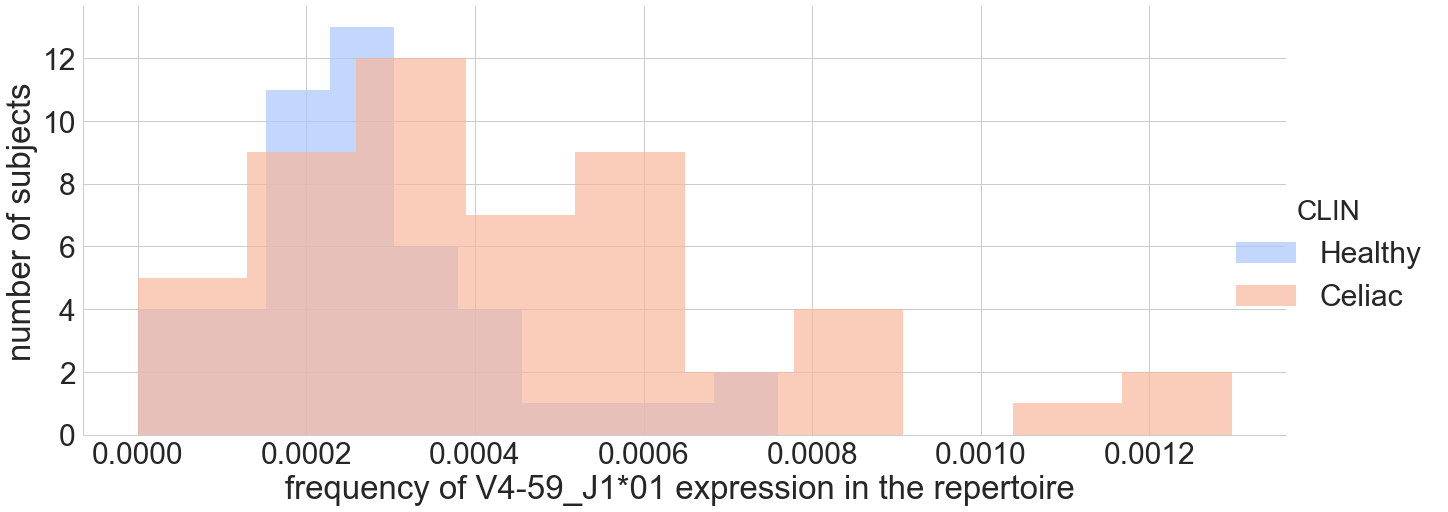

In [101]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(df,hue="CLIN",palette='coolwarm',size=8,aspect=3)
g = g.map(plt.hist,'V4-59_J1*01',bins=10,alpha=0.7).add_legend().set_axis_labels(
    "frequency of V4-59_J1*01 expression in the repertoire ", "number of subjects")
g.fig.set_size_inches(20,8)


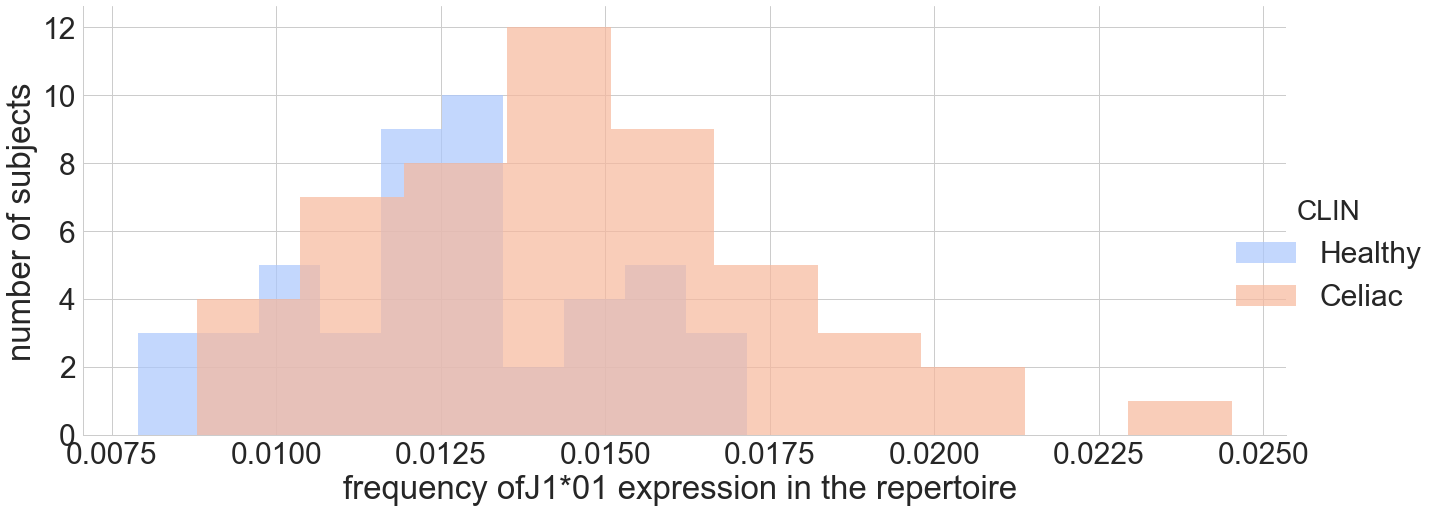

In [92]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(df,hue="CLIN",palette='coolwarm',size=8,aspect=3)
g = g.map(plt.hist,'J1*01',bins=10,alpha=0.7).add_legend().set_axis_labels(
    "frequency ofJ1*01 expression in the repertoire ", "number of subjects")
g.fig.set_size_inches(20,8)


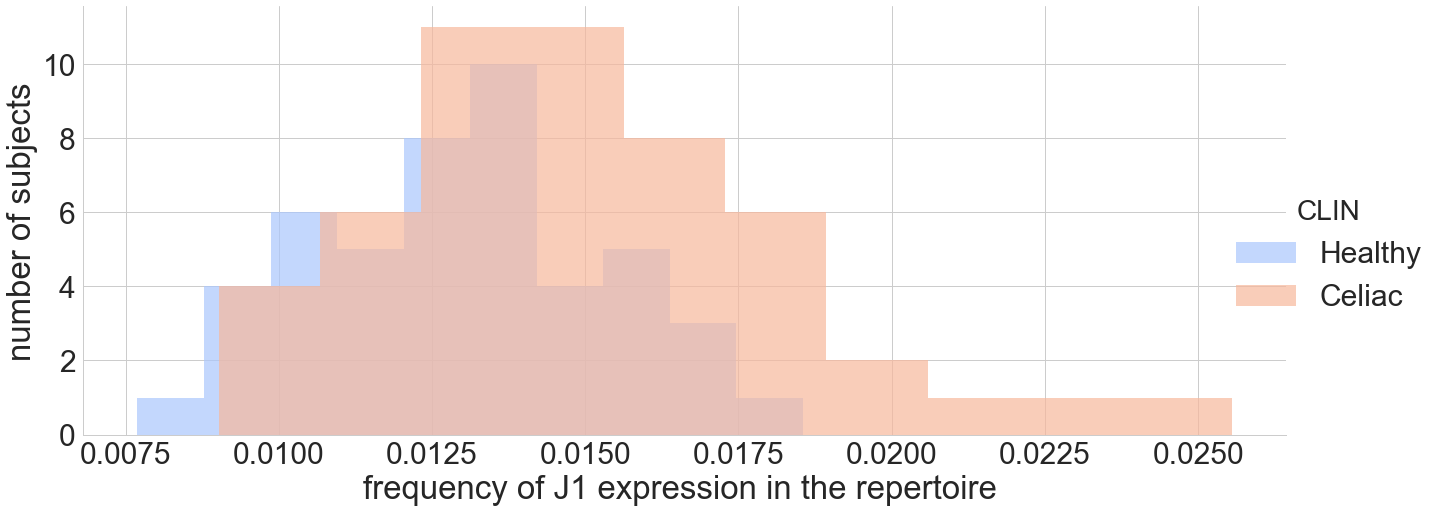

In [95]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(df,hue="CLIN",palette='coolwarm',size=8,aspect=3)
g = g.map(plt.hist,'J1',bins=10,alpha=0.7).add_legend().set_axis_labels(
    "frequency of J1 expression in the repertoire ", "number of subjects")
g.fig.set_size_inches(20,8)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

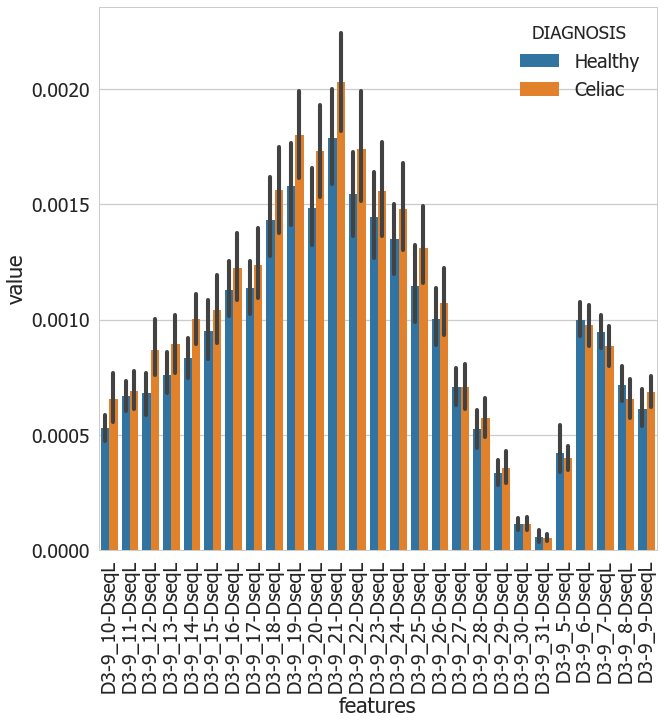

In [200]:

df_gene = df

df_gene.rename(columns={'CLIN': 'DIAGNOSIS'}, inplace=True) # change CLIN to diagnosis
# cout raws per diagnosis class 
 #ax = sns.countplot(df_gene['DIAGNOSIS'],label="Count")       
C, H = df_gene['DIAGNOSIS'].value_counts()

#seaborn graph
data = df_gene
# y includes our labels and x includes our features
y = data.DIAGNOSIS
# get the cols with the string '.mean'
specific_cols = [col for col in df if 'D3-9_' in col]
data_features =data.loc[:, specific_cols[:] ] 

# standardization 
  #data_n_2 = (data_features - data_features.mean()) / (data_features.std())
# binding data
data_features = pd.concat([y,data_features],axis=1)

#create graph
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')


# plot style
plt.figure(figsize=(10,10))
sns.set_context( "talk",font_scale=1.5)
ax = sns.barplot(x="features", y="value", hue="DIAGNOSIS", data=data_features)
plt.xticks(rotation=90)

D3-16_15 Vs D3-16_19


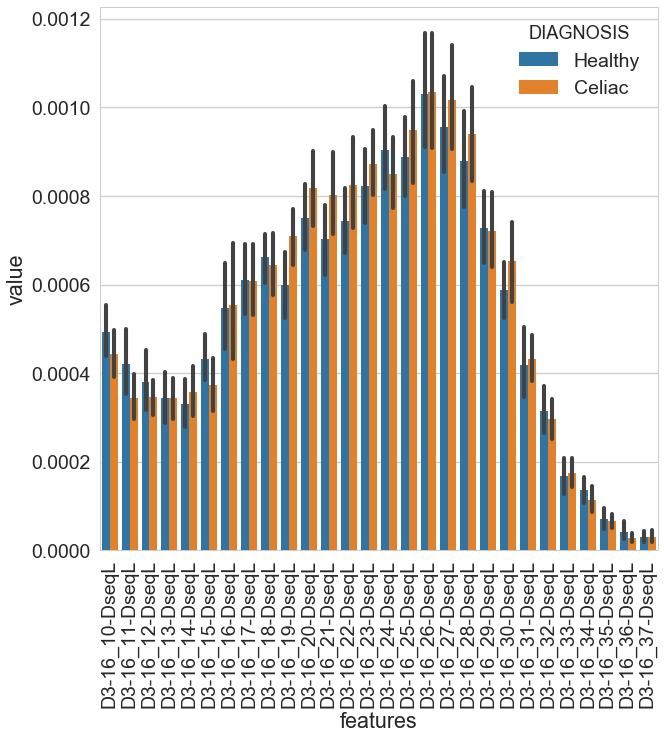

In [143]:

df_gene = df

df_gene.rename(columns={'CLIN': 'DIAGNOSIS'}, inplace=True) # change CLIN to diagnosis
# cout raws per diagnosis class 
 #ax = sns.countplot(df_gene['DIAGNOSIS'],label="Count")       
C, H = df_gene['DIAGNOSIS'].value_counts()

#seaborn graph
data = df_gene
# y includes our labels and x includes our features
y = data.DIAGNOSIS
# get the cols with the string '.mean'
specific_cols = [col for col in df if 'D3-16_' in col]
data_features =data.loc[:, specific_cols[:-5] ] 

# standardization 
  #data_n_2 = (data_features - data_features.mean()) / (data_features.std())
# binding data
data_features = pd.concat([y,data_features],axis=1)

#create graph
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')


# plot style
plt.figure(figsize=(10,10))
sns.set_context( "talk",font_scale=1.5)
ax = sns.barplot(x="features", y="value", hue="DIAGNOSIS", data=data_features)
plt.xticks(rotation=90)
print('D3-16_15 Vs D3-16_19')

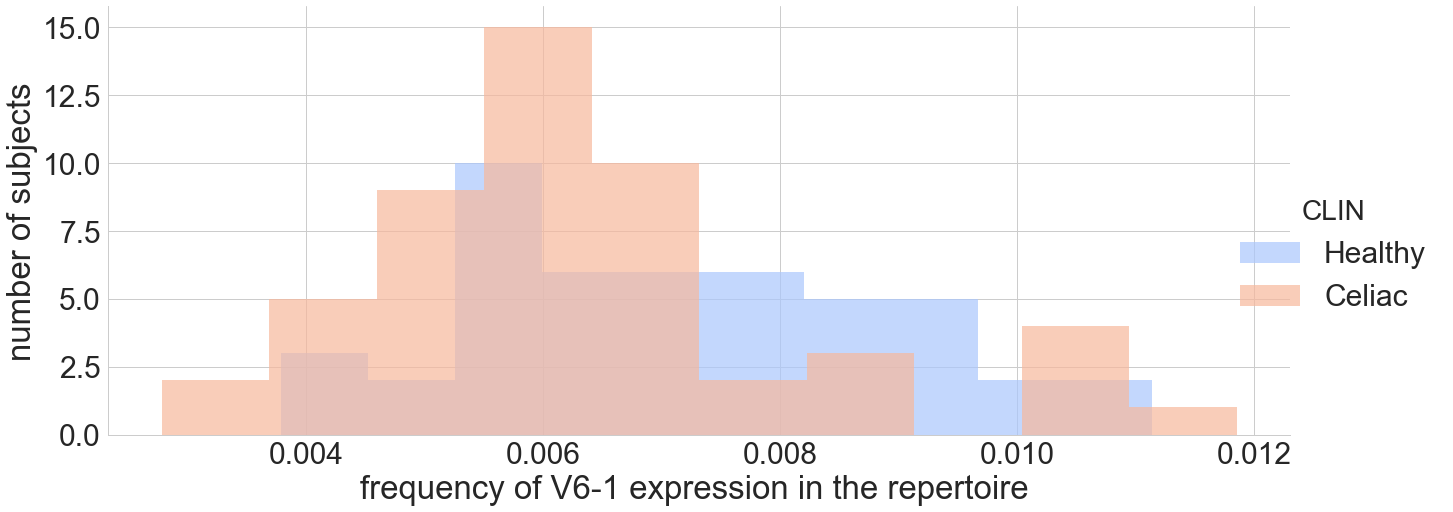

In [140]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqLall_rFRAME')

sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(df,hue="CLIN",palette='coolwarm',size=8,aspect=3)
g = g.map(plt.hist,'V6-1',bins=10,alpha=0.7).add_legend().set_axis_labels(
    "frequency of V6-1 expression in the repertoire ", "number of subjects")
g.fig.set_size_inches(20,8)


With median estimator